In [2]:
# import os
# os.environ["GEOMSTATS_BACKEND"] = "pytorch"
# os.environ['NUMEXPR_MAX_THREADS'] = '15'

import numpy as np
import pandas as pd
from pathlib import Path
from functions import *
import matplotlib.pyplot as plt
# from functionsgpu import *
from plotting_beta import *

INFO: Using numpy backend


In [2]:
brooke_df = pd.read_csv('brooke_df.csv')
brooke_df = brooke_df.dropna(subset=['Brooke'])
df1 = brooke_df.drop_duplicates(subset=['Subj#'], keep='first').reset_index(drop=True)
df1['Group'].value_counts()

Group
DMD        24
Healthy    23
SMA         7
Name: count, dtype: int64

In [3]:
brooke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Subj#                 112 non-null    int64  
 1   Visit #               112 non-null    object 
 2   Age @ 
enrollment     52 non-null     float64
 3   Gender                112 non-null    object 
 4   Dom                   112 non-null    object 
 5   Group                 112 non-null    object 
 6   Visit Date            112 non-null    object 
 7   Brooke                112 non-null    float64
 8   HMFSE (max 66)        18 non-null     object 
 9   CHOP INTEND (max 64)  3 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 9.6+ KB


In [4]:
pose_dir = Path("/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos")
betas = {}


for index, row in brooke_df.iterrows():
    subj = str(row['Subj#']).strip()
    visit_date = str(row['Visit Date']).strip()
    visit_date_clean = pd.to_datetime(visit_date).strftime('%m-%d-%y')

    pose_path = Path(os.path.join(pose_dir, subj, visit_date_clean,'3D'))
    fpath = pose_path / f"{subj}_rflex_1.npy"

    pose_arr = np.load(fpath)
    print(fpath, pose_arr.shape)

    betas[subj+'_' + visit_date] = pose_arr

/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/1/01-27-21/3D/1_rflex_1.npy (13, 3, 37)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/1/07-08-21/3D/1_rflex_1.npy (13, 3, 38)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/1/11-10-21/3D/1_rflex_1.npy (13, 3, 34)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/1/08-15-23/3D/1_rflex_1.npy (13, 3, 33)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/1/02-20-24/3D/1_rflex_1.npy (13, 3, 24)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/1/08-28-24/3D/1_rflex_1.npy (13, 3, 24)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/2/02-11-21/3D/2_rflex_1.npy (13, 3, 79)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/3/02-24-21/3D/3_rflex_1.npy (13, 3, 37)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/3/07-20-21/3D/3_rflex_1.npy (13, 3, 22)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/3/01-26-22/3D/3_rflex_1.npy (13, 3, 35)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/5/03-11-21/3D/5_rflex_1.npy (13, 3, 132)
/mnt/sdb/arafat/U-Extend/IEEE_Codes/videos/7/04-21-21/3D/7_rflex_1.npy (13, 3, 20)
/mn

In [26]:
# betas

In [5]:
gamma_t = np.linspace(0, 1, 50)
betas_resampled = process_kinematic(betas, gamma_t)

In [6]:
len(betas_resampled)

112

In [7]:
%matplotlib qt5
a = plotting_beta_skl(betas_resampled[50], zoom = 1.5)

  0%|          | 0/50 [00:00<?, ?it/s]

INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not 

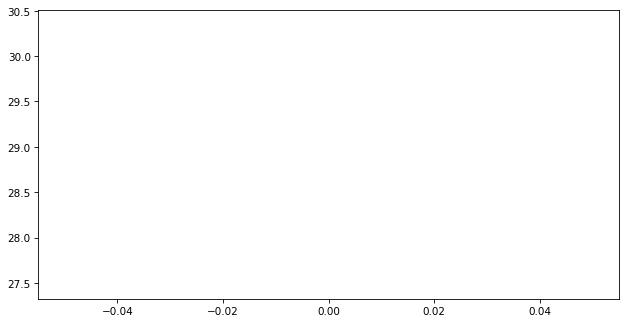

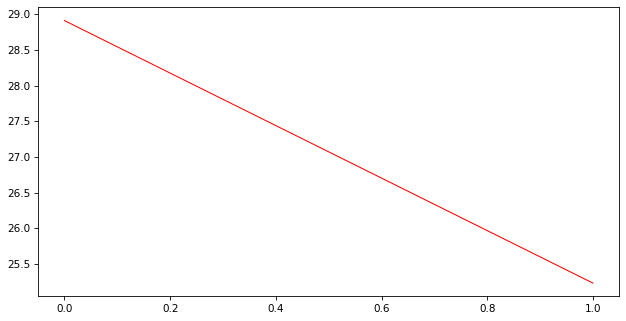

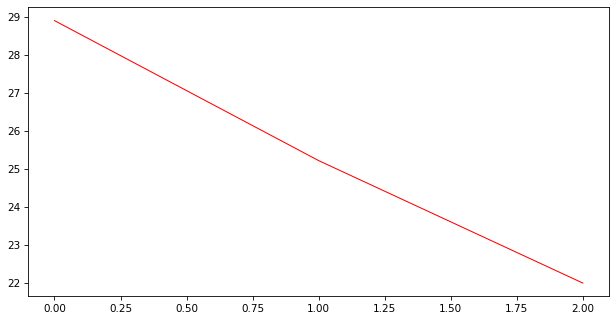

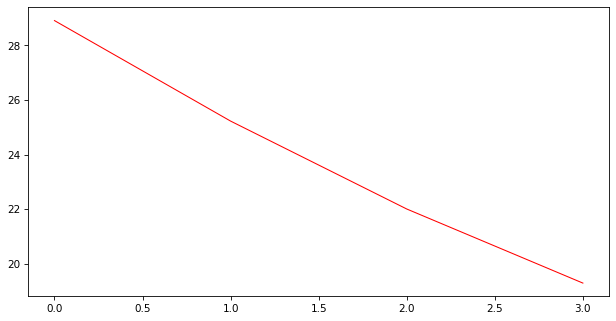

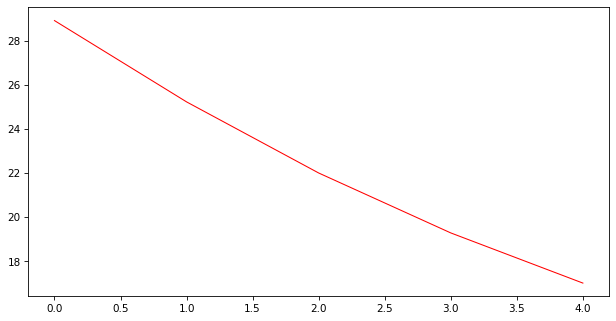

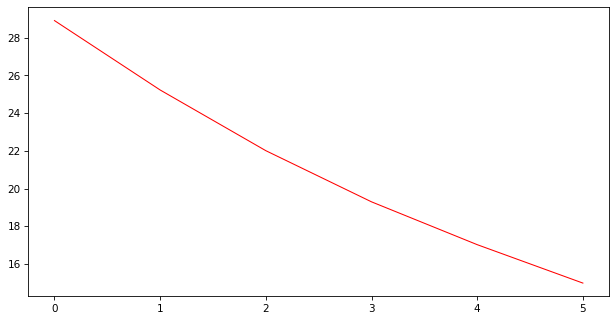

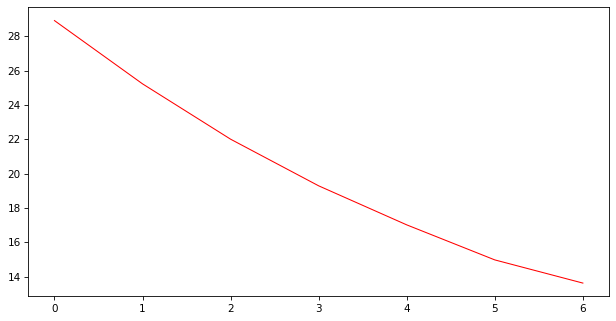

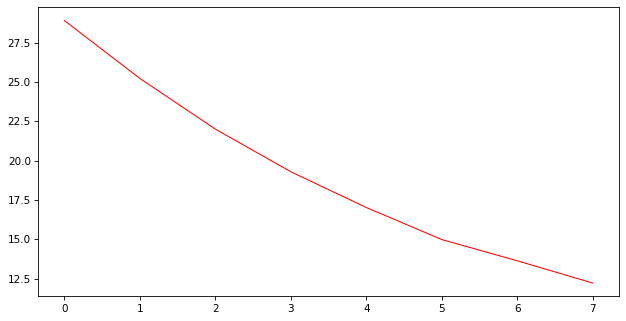

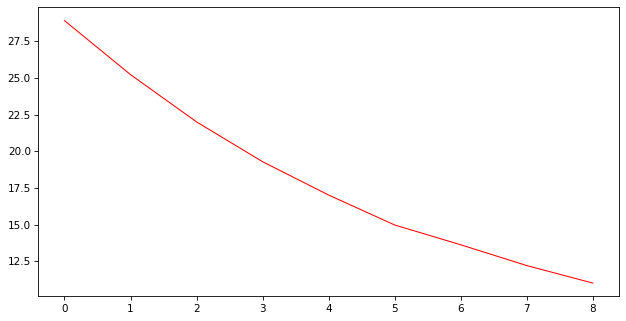

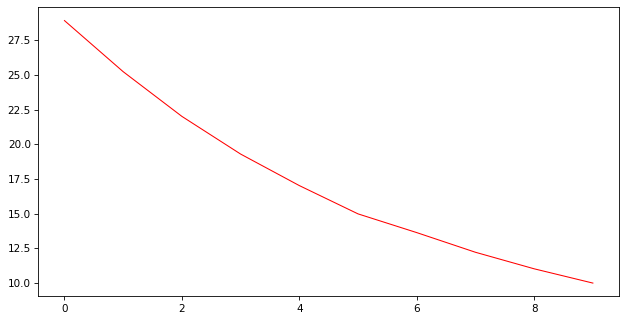

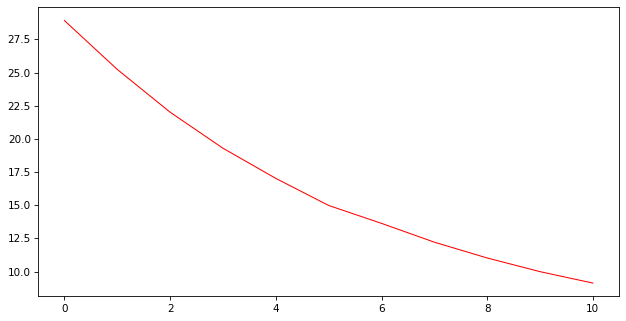

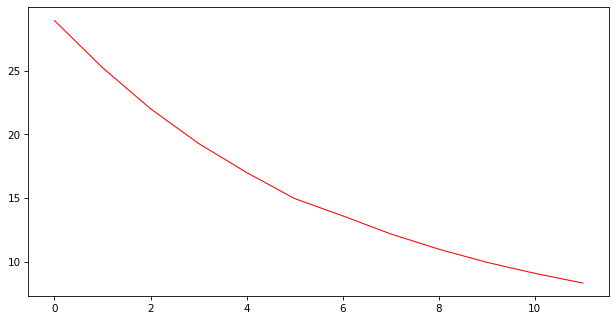

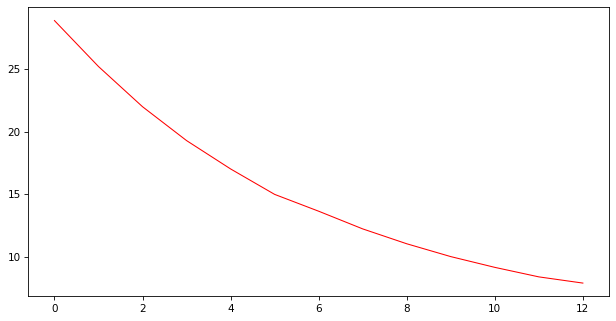

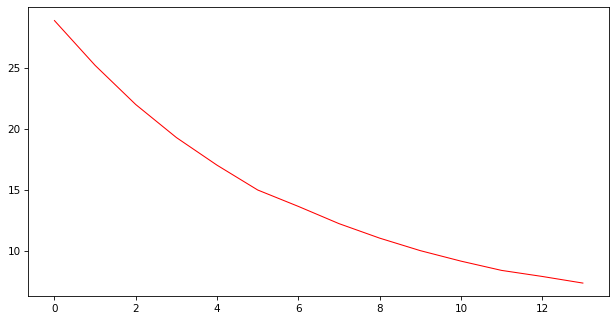

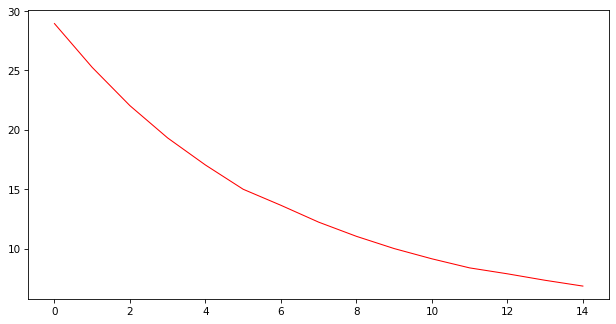

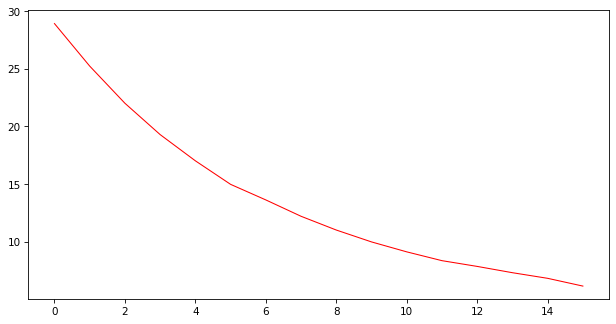

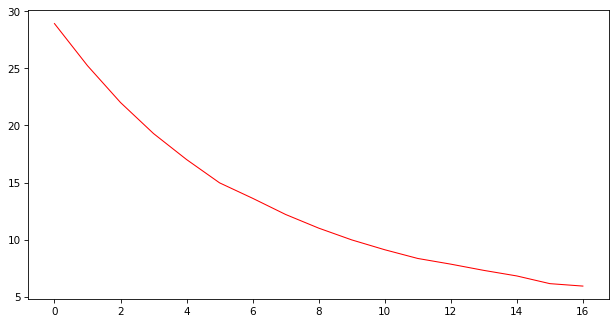

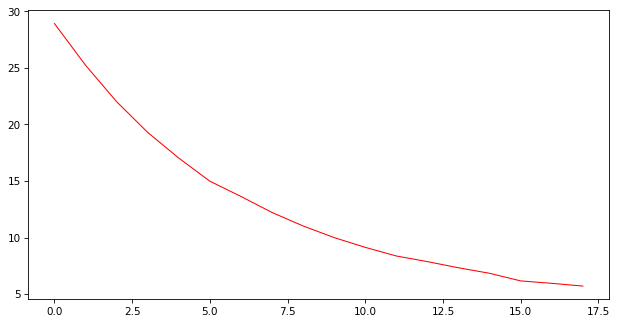

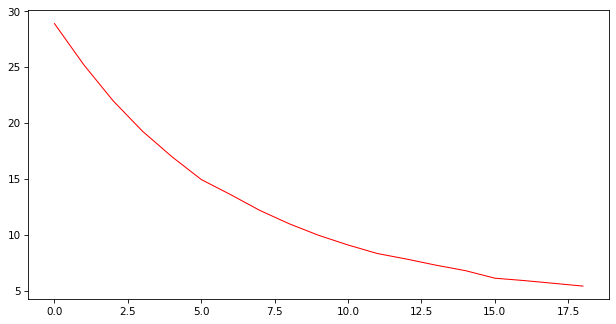

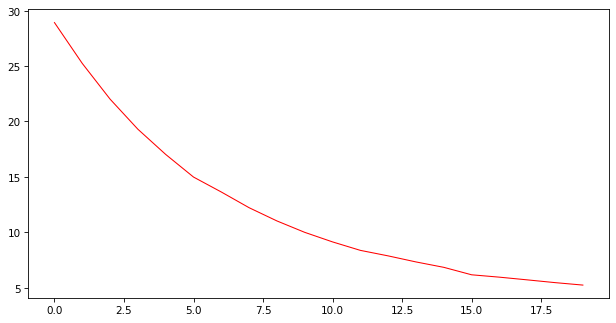

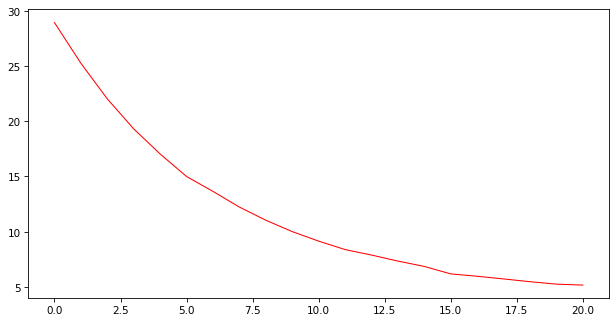

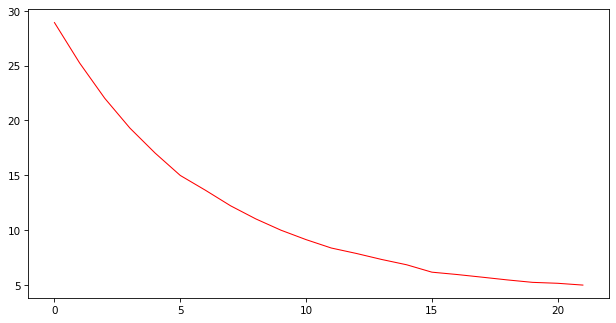

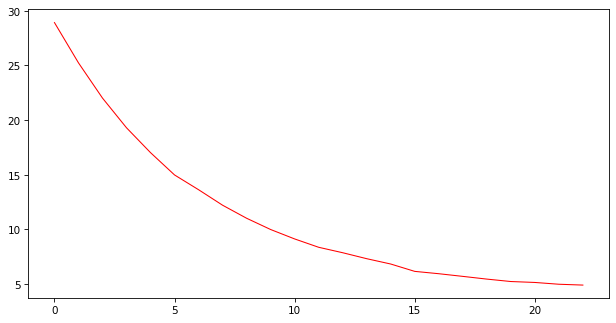

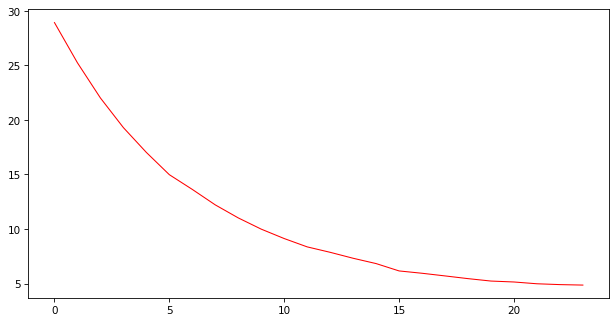

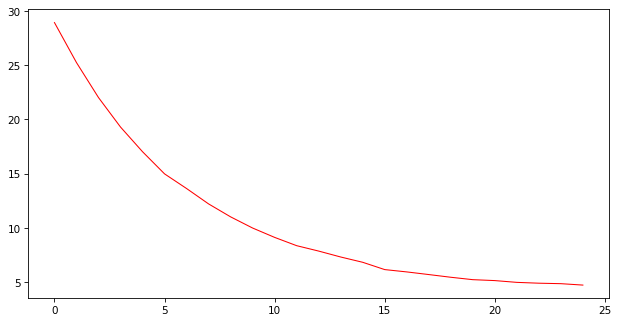

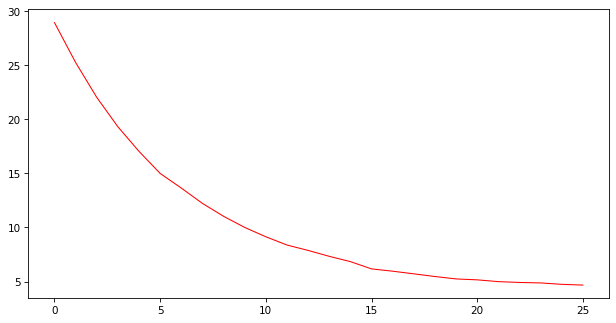

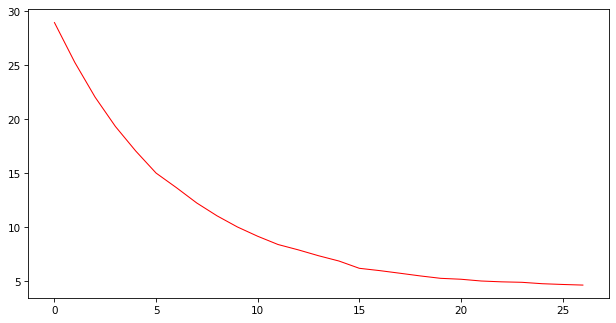

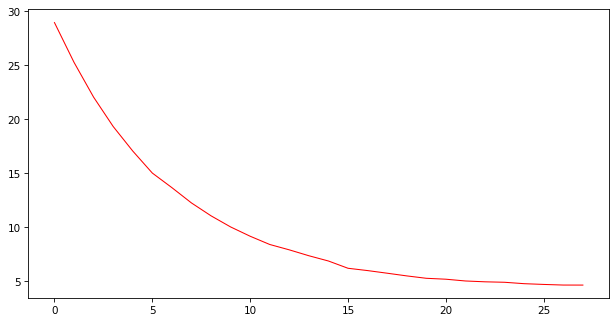

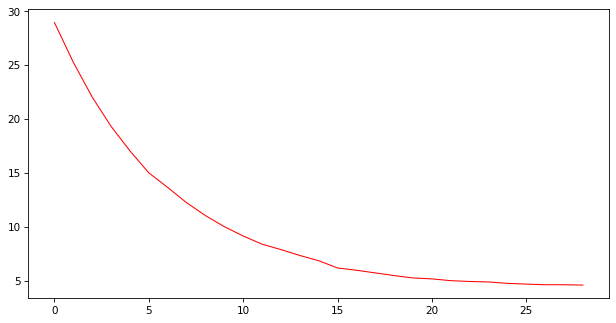

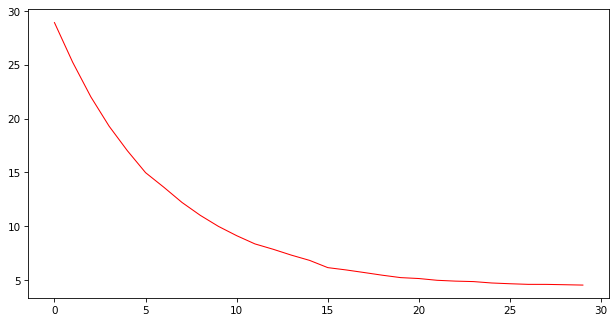

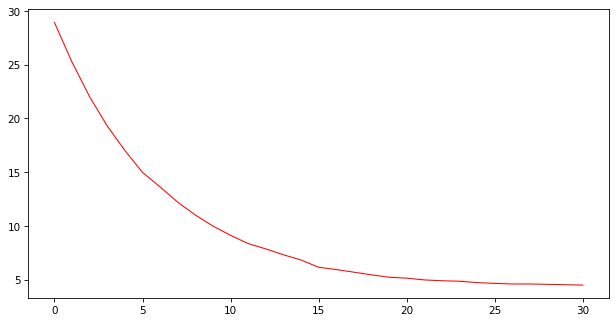

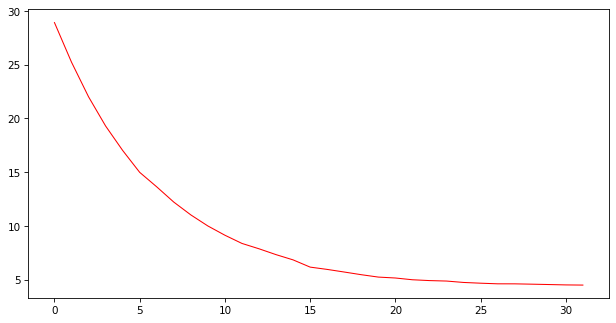

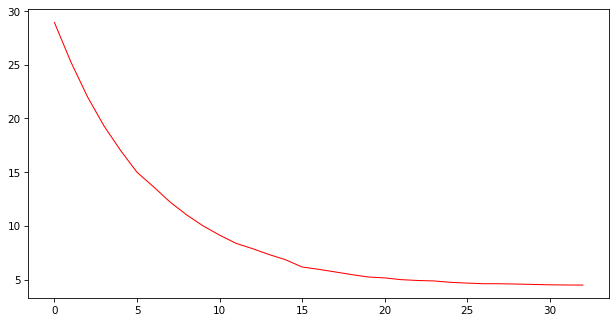

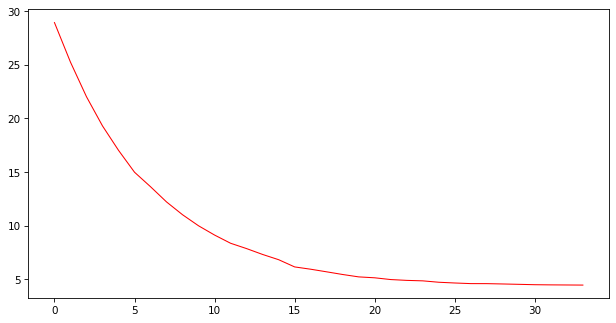

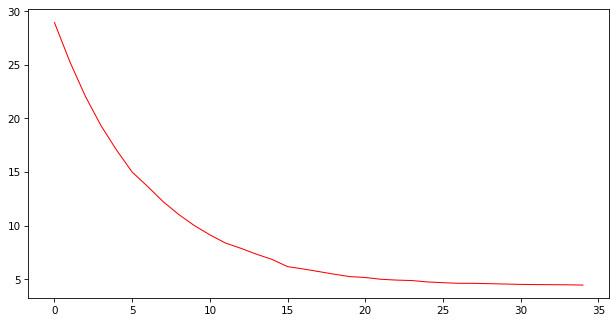

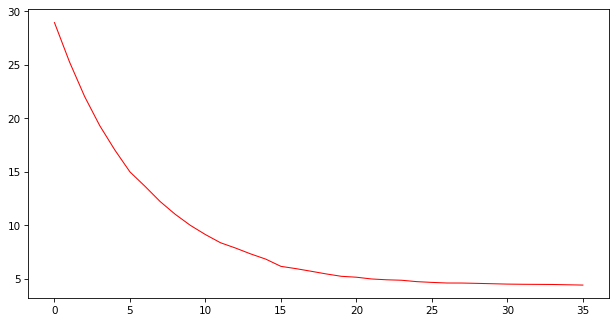

  0%|          | 0/10 [00:00<?, ?it/s]


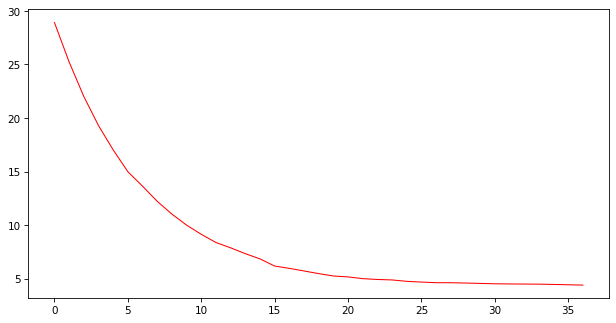

  0%|          | 0/10 [00:00<?, ?it/s]


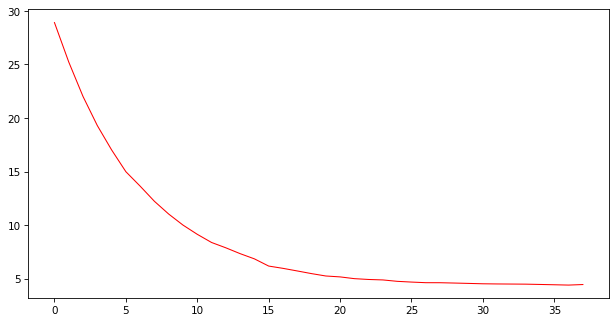

  0%|          | 0/10 [00:00<?, ?it/s]


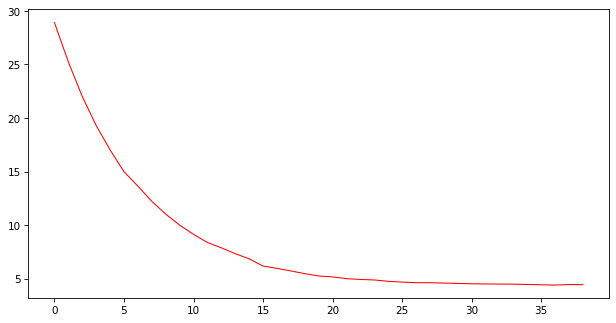

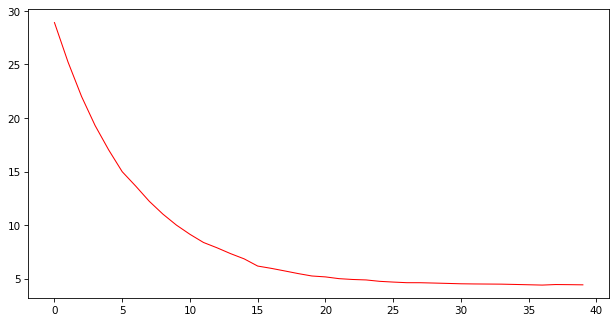

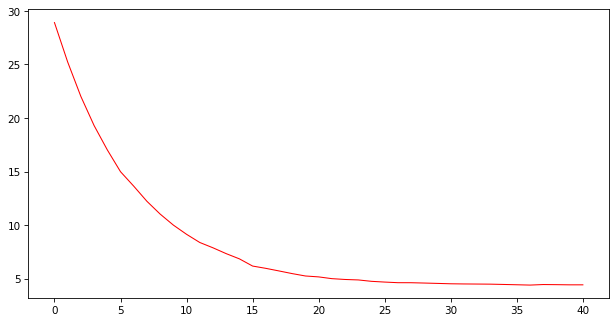

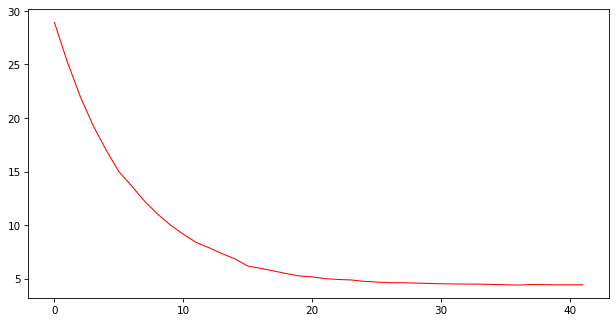

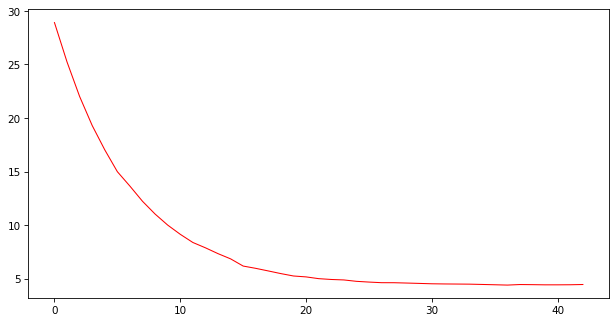

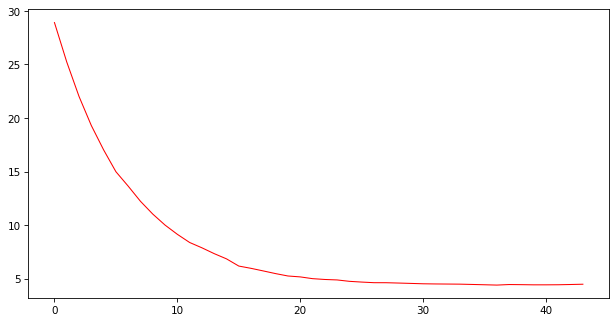

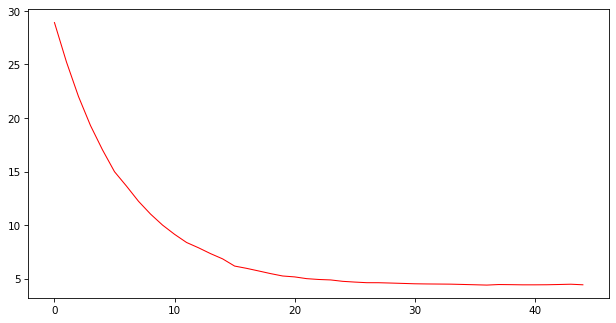

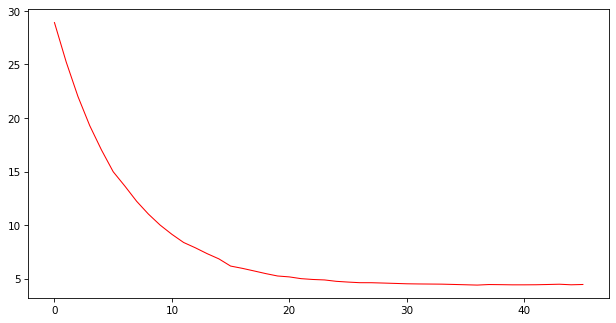

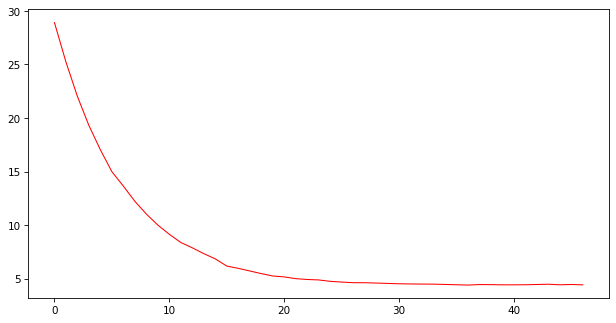

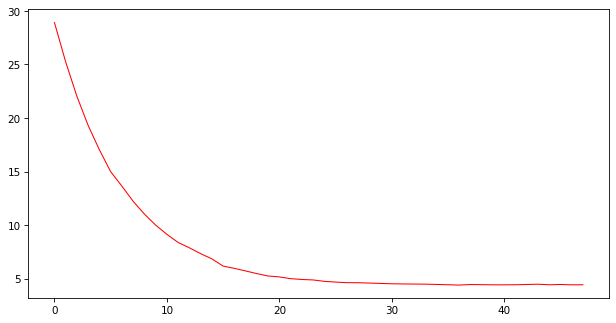

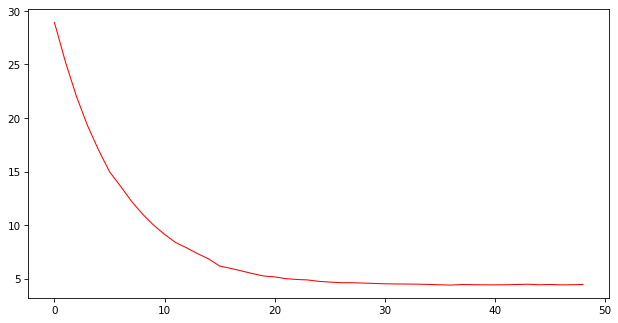

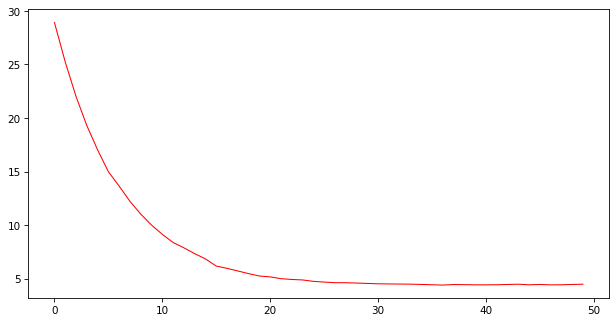

In [8]:
%matplotlib inline
mu_init = betas_resampled[np.random.choice(range(len(betas_resampled)))]
mu_all, betas_aligned_all, gammas_all, tangent_vec_all, history_all = frechet(betas_resampled, gamma_t, mu_init, iterations=50)

In [15]:
K = 13
M = 3
T = 50
R = 9

tangent_flat = tangent_vec_all.reshape((K*M*T, len(betas_aligned_all)))
U, sigma, V_t = np.linalg.svd(tangent_flat)
pc_cords = np.diag(sigma[0:R])@V_t[0:R,:]

print(pc_cords.shape)

(9, 112)


In [16]:
ft = np.transpose(pc_cords)
ft.shape

(112, 9)

In [27]:
brooke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Subj#                 112 non-null    int64  
 1   Visit #               112 non-null    object 
 2   Age @ 
enrollment     52 non-null     float64
 3   Gender                112 non-null    object 
 4   Dom                   112 non-null    object 
 5   Group                 112 non-null    object 
 6   Visit Date            112 non-null    object 
 7   Brooke                112 non-null    float64
 8   HMFSE (max 66)        18 non-null     object 
 9   CHOP INTEND (max 64)  3 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 13.7+ KB


In [48]:
pf = pd.read_csv('Patient_Id_date.csv')
pf = pf.sort_values(by='Patient_Id')
pf

,Patient_Id,date
32,1,2023-08-15
30,1,2021-03-26
29,1,2021-11-10
31,1,2024-08-28
33,1,2021-07-08
...,...,...
0,63,2024-03-29
21,64,2024-03-29
44,65,2024-03-29
34,66,2024-03-29


In [50]:
df = pd.DataFrame(ft)
df['subject'] = brooke_df["Subj#"].values
df['Brooke'] = brooke_df["Brooke"].values
df['visit_date'] = brooke_df["Visit Date"].values
df

,0,1,2,3,4,5,6,7,8,subject,Brooke,visit_date
0,3.007770,-0.303813,2.836406,0.267367,-0.346704,-0.392697,-0.402937,0.635970,-0.421841,1,1.0,1/27/2021
1,-2.624011,1.372070,5.117777,-1.204715,0.415965,-0.547631,0.114950,0.122290,1.254424,1,1.0,7/8/2021
2,2.310311,0.559889,3.158699,-0.485529,0.318258,0.196438,-0.900004,0.387327,0.081394,1,1.0,11/10/2021
3,-1.781717,-0.280119,0.349220,2.308133,1.332475,-0.629383,0.368755,-0.744698,-0.793646,1,2.0,8/15/2023
4,-0.028723,-2.215644,0.040430,1.072513,0.779641,-0.227556,-0.639629,-0.150426,-0.669834,1,3.0,2/20/2024
...,...,...,...,...,...,...,...,...,...,...,...,...
107,3.041536,-1.327914,0.714702,1.689800,0.766394,-0.143083,0.582232,0.617514,-0.423965,67,1.0,3/29/2024
108,1.697208,-0.876867,0.146139,-1.265989,0.017034,-2.281919,0.009099,-1.070530,-1.230628,69,5.0,5/9/2024
109,5.301540,0.194881,1.330886,0.901739,3.027589,0.283925,0.710437,0.396404,0.338961,71,1.0,9/25/2024
110,5.570883,0.527196,1.361034,1.164364,3.088408,0.419515,0.887807,0.369711,0.239050,71,1.0,3/18/2025


In [51]:
# Convert date columns to datetime format for proper matching
pf['date'] = pd.to_datetime(pf['date'])
df['visit_date'] = pd.to_datetime(df['visit_date'])

# Merge the dataframes on subject ID and visit date
merged_df = pd.merge(
    pf, 
    df, 
    left_on=['Patient_Id', 'date'], 
    right_on=['subject', 'visit_date'],
    how='inner'  # Change to 'left', 'right', or 'outer' as needed
)

merged_df

,Patient_Id,date,0,1,2,3,4,5,6,7,8,subject,Brooke,visit_date
0,1,2023-08-15,-1.781717,-0.280119,0.349220,2.308133,1.332475,-0.629383,0.368755,-0.744698,-0.793646,1,2.0,2023-08-15
1,1,2021-11-10,2.310311,0.559889,3.158699,-0.485529,0.318258,0.196438,-0.900004,0.387327,0.081394,1,1.0,2021-11-10
2,1,2024-08-28,-0.028723,-2.215644,0.040430,1.072513,0.779641,-0.227556,-0.639629,-0.150426,-0.669834,1,3.0,2024-08-28
3,1,2021-07-08,-2.624011,1.372070,5.117777,-1.204715,0.415965,-0.547631,0.114950,0.122290,1.254424,1,1.0,2021-07-08
4,2,2021-02-11,-2.933174,-2.040673,-1.579417,-3.841750,1.663927,-0.917550,-2.236312,-0.210353,-0.126819,2,5.0,2021-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,63,2024-03-29,2.719529,-1.547641,0.434275,0.409333,0.842907,-0.252096,1.202727,0.044173,0.281651,63,1.0,2024-03-29
62,64,2024-03-29,-0.041687,-3.785400,-0.010926,-1.214782,0.279828,-0.109528,0.868636,0.367624,0.090616,64,1.0,2024-03-29
63,65,2024-03-29,0.574036,-2.642239,0.134278,0.046874,0.922403,-0.271755,0.960724,0.641499,0.090262,65,1.0,2024-03-29
64,66,2024-03-29,3.022770,-1.535652,1.334259,0.203505,0.954197,-0.368918,1.170729,0.270682,0.130474,66,1.0,2024-03-29


In [54]:
df = merged_df.loc[:,0:'Brooke']
df

,0,1,2,3,4,5,6,7,8,subject,Brooke
0,-1.781717,-0.280119,0.349220,2.308133,1.332475,-0.629383,0.368755,-0.744698,-0.793646,1,2.0
1,2.310311,0.559889,3.158699,-0.485529,0.318258,0.196438,-0.900004,0.387327,0.081394,1,1.0
2,-0.028723,-2.215644,0.040430,1.072513,0.779641,-0.227556,-0.639629,-0.150426,-0.669834,1,3.0
3,-2.624011,1.372070,5.117777,-1.204715,0.415965,-0.547631,0.114950,0.122290,1.254424,1,1.0
4,-2.933174,-2.040673,-1.579417,-3.841750,1.663927,-0.917550,-2.236312,-0.210353,-0.126819,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
61,2.719529,-1.547641,0.434275,0.409333,0.842907,-0.252096,1.202727,0.044173,0.281651,63,1.0
62,-0.041687,-3.785400,-0.010926,-1.214782,0.279828,-0.109528,0.868636,0.367624,0.090616,64,1.0
63,0.574036,-2.642239,0.134278,0.046874,0.922403,-0.271755,0.960724,0.641499,0.090262,65,1.0
64,3.022770,-1.535652,1.334259,0.203505,0.954197,-0.368918,1.170729,0.270682,0.130474,66,1.0


In [24]:
pd.set_option('display.max_columns', None)
Xdf = pd.read_csv('X_df.csv')
Xdf

,pids_curl,PID,Visit #_curl,Age_curl,Forearm_Length (cm)_curl,CSA (cm^2)_curl,Normalized_CSA (cm^2/cm)_curl,Avg_Long_Echo_curl,Avg_Trans_Echo_curl,Avg_Echo_curl,Norm_Avg_Echo_curl,Est_Specific_Tension_curl,Est_Specific_Tension_normCSA_curl,Muscle_score1_curl,Muscle Score2_curl,Muscle_score3_curl,Muscle_score4_curl,Brooke_curl,HFMSE_curl,Average Dyn. (lbsf)_curl,Dyan. St Dev._curl,Location of dynamometry from wrist (cm)_curl,Avg. Dynamometry (N)_curl,StDev. Dynamometry (N)_curl,Elbow Torque (Nm)_curl,Normalized Elbow Torque (Nm/cm)_curl,EF(MOD-sp4)\n(Normal: 55-70%)_curl,EF(MOD-sp2)\n(Normal: 55-70%)_curl,EF(MOD-BP)\n(Normal: 55-70%)_curl,Total Body (minus head) Z-score_curl,Lumbar Spine Z-score_curl,Total Hip Z-Score_curl,RBC (M/uL)_curl,Hb (g/dL)_curl,MCV (fL)_curl,AST_curl,ALT_curl,Albumin_curl,Vit. D (ng/ML)_curl,CK_curl,FVC pred_curl,FVC pre_curl,FVC % pred (pre)_curl,FEV1 pred_curl,FEV1 pre_curl,FEV1 % pred (pre)_curl,FEV1/FVC pred_curl,FEV1/FVC pre_curl,FEV1/FVC % pred (pre)_curl,FEFMAX pred_curl,FEFMAX pre_curl,FEFMAX % pred (pre)_curl,FEF 25-75% pred_curl,FEF 25-75% pre_curl,FEF 25-75% pred (pre)_curl,TET pre_curl,MEP pred_curl,MEP pre_curl,MEP % pred (pre)_curl,MIP pred_curl,MIP pre_curl,MIP % pred (pre)_curl,Normalized_Dynamometry (N/cm)_curl,vpc1_curl,vpc2_curl,vpc3_curl,visits_curl,Sensor Data Date_curl,Cohort_curl,DTW_curl,LCSS_curl,DEXA Date_curl,pids_knock,Visit #_knock,Age_knock,Forearm_Length (cm)_knock,CSA (cm^2)_knock,Normalized_CSA (cm^2/cm)_knock,Avg_Long_Echo_knock,Avg_Trans_Echo_knock,Avg_Echo_knock,Norm_Avg_Echo_knock,Est_Specific_Tension_knock,Est_Specific_Tension_normCSA_knock,Muscle_score1_knock,Muscle Score2_knock,Muscle_score3_knock,Muscle_score4_knock,Brooke_knock,HFMSE_knock,Average Dyn. (lbsf)_knock,Dyan. St Dev._knock,Location of dynamometry from wrist (cm)_knock,Avg. Dynamometry (N)_knock,StDev. Dynamometry (N)_knock,Elbow Torque (Nm)_knock,Normalized Elbow Torque (Nm/cm)_knock,EF(MOD-sp4)\n(Normal: 55-70%)_knock,EF(MOD-sp2)\n(Normal: 55-70%)_knock,EF(MOD-BP)\n(Normal: 55-70%)_knock,Total Body (minus head) Z-score_knock,Lumbar Spine Z-score_knock,Total Hip Z-Score_knock,RBC (M/uL)_knock,Hb (g/dL)_knock,MCV (fL)_knock,AST_knock,ALT_knock,Albumin_knock,Vit. D (ng/ML)_knock,CK_knock,FVC pred_knock,FVC pre_knock,FVC % pred (pre)_knock,FEV1 pred_knock,FEV1 pre_knock,FEV1 % pred (pre)_knock,FEV1/FVC pred_knock,FEV1/FVC pre_knock,FEV1/FVC % pred (pre)_knock,FEFMAX pred_knock,FEFMAX pre_knock,FEFMAX % pred (pre)_knock,FEF 25-75% pred_knock,FEF 25-75% pre_knock,FEF 25-75% pred (pre)_knock,TET pre_knock,MEP pred_knock,MEP pre_knock,MEP % pred (pre)_knock,MIP pred_knock,MIP pre_knock,MIP % pred (pre)_knock,Normalized_Dynamometry (N/cm)_knock,vpc1_knock,vpc2_knock,vpc3_knock,visits_knock,Sensor Data Date_knock,Cohort_knock,DTW_knock,LCSS_knock,DEXA Date_knock
0,1.0,1.0,1.54,10.0,19.540,3.315800,0.218206,52.0146,57.90420,54.95940,0.215527,0.516062,8.151529,0.003941,12.163743,0.170505,0.003913,1.0,44.54,3.225480,0.690810,12.20,14.347645,3.072876,1.704116,0.087087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737187,4.267394,-4.547938,2.283747,2021-07-08,2021-07-08,DMD,0.0965,0.9755,NaN,1.0,1.53,10.0,19.530,3.308100,0.218960,52.0047,58.09690,55.05080,0.215885,0.516431,8.111727,0.003948,12.225704,0.171016,0.003920,1.0,44.53,3.233860,0.698520,12.15,14.384921,3.107171,1.701341,0.086989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.739481,-14.005069,6.536640,4.860552,2021-03-26,2021-03-26,DMD,0.105,0.985,NaN
1,2.0,2.0,1.00,12.0,24.000,7.590000,0.316250,53.4000,41.45000,47.42500,0.185980,0.168786,4.050869,0.006668,14.998156,0.257434,0.006600,5.0,NaN,1.596667,0.703612,18.00,7.102325,3.129821,1.278418,0.053267,NaN,NaN,NaN,NaN,NaN,NaN,5.250,15.600,89.900,49.00,124.00,4.600,38.00,NaN,1.76,1.17,66.0,1.55,1.02,65.0,88.0,87

In [3]:
Xdf = pd.read_csv('us.csv')
Xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SubjectNumber                      99 non-null     int64  
 1   Brooke_Score                       99 non-null     float64
 2   BIC_TAI                            99 non-null     float64
 3   BIC_CSA_mm2                        99 non-null     float64
 4   BIC_Max_Trans_Muscle_Thickness_mm  99 non-null     float64
 5   BIC_Max_Feret_Diameter_mm          99 non-null     float64
 6   BIC_DiameterRatio                  99 non-null     float64
 7   BIC_Avg_Echo                       99 non-null     float64
 8   BRD_TAI                            99 non-null     float64
 9   BRD_CSA_mm2                        99 non-null     float64
 10  BRD_Max_Trans_Muscle_Thickness_mm  99 non-null     float64
 11  BRD_Max_Feret_Diameter_mm          99 non-null     float64
 

In [4]:
df = Xdf.copy()
df = df.rename(columns={"Brooke_Score": "Brooke", "SubjectNumber": "subject"})
df = df.dropna()
print(len(df['subject'].unique()))
df

45


,subject,Brooke,BIC_TAI,BIC_CSA_mm2,BIC_Max_Trans_Muscle_Thickness_mm,BIC_Max_Feret_Diameter_mm,BIC_DiameterRatio,BIC_Avg_Echo,BRD_TAI,BRD_CSA_mm2,BRD_Max_Trans_Muscle_Thickness_mm,BRD_Max_Feret_Diameter_mm,BRD_DiameterRatio,BRD_Avg_Echo
0,1,1.0,0.86,377.85,13.14,35.29,0.31,57.06,0.90,278.50,11.32,31.96,0.29,51.62
1,1,1.0,0.91,359.34,14.04,33.92,0.35,53.24,0.93,320.10,11.40,36.08,0.26,56.29
2,1,1.0,0.87,504.78,20.02,33.76,0.50,51.38,0.89,321.19,11.30,36.21,0.26,47.29
3,1,2.0,0.85,639.51,22.00,38.27,0.48,86.00,0.88,430.84,14.04,38.31,0.31,66.72
4,1,3.0,0.83,446.48,17.10,31.67,0.50,92.71,0.84,310.12,11.10,34.65,0.30,78.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,51,5.0,0.91,368.72,13.72,34.52,0.37,82.12,0.94,422.94,14.38,35.06,0.35,56.80
95,52,1.0,0.95,387.38,15.06,35.30,0.37,43.01,0.91,429.17,16.46,38.71,0.33,36.40
96,53,2.0,0.91,418.78,16.04,34.89,0.34,45.31,0.93,265.28,11.60,31.48,0.32,29.83
97,56,3.0,0.94,264.75,14.08,26.44,0.44,67.82,0.88,306.32,13.26,31.30,0.34,77.85


In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import spearmanr
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target - FIXED
X = df.loc[:, 'BIC_TAI':'BRD_Avg_Echo']  # First 9 columns as features (actual data, not column names)
y = df['Brooke']
subjects = df['subject']

# Remove rows where subject or target is NaN
valid_mask = ~(subjects.isna() | y.isna())
X = X[valid_mask]
y = y[valid_mask]
subjects = subjects[valid_mask]

print(f"After removing NaN values:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"subjects shape: {subjects.shape}")

# Initialize models with 20 core CPU utilization
models = {
    'KNN': KNeighborsRegressor(n_neighbors=5, n_jobs=20),
    'SVM': SVR(kernel='rbf', C=1.0, gamma='scale'),  # SVM doesn't support n_jobs
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=20),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0, n_jobs=20),
    'Ridge': Ridge(alpha=1.0),  # Ridge doesn't support n_jobs
    'Lasso': Lasso(alpha=0.1, max_iter=1000),  # Lasso doesn't support n_jobs
    'MLP': MLPRegressor(
        hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
        activation='relu',
        solver='adam',
        alpha=0.001,  # L2 regularization
        batch_size='auto',
        learning_rate='constant',
        learning_rate_init=0.001,
        max_iter=1000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        tol=1e-4
    )
}

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Spearman correlation with p-value
    correlation, p_value = spearmanr(y_true, y_pred)
    
    return mae, mse, correlation, p_value

# Leave-One-Subject-Out Cross-Validation with Combined Predictions
def loso_cv_combined(X, y, subjects, models):
    unique_subjects = subjects.dropna().unique()
    
    # Store all predictions and true values for each model
    all_predictions = {model_name: {'y_true': [], 'y_pred': []} 
                      for model_name in models.keys()}
    
    print(f"Performing Leave-One-Subject-Out CV with {len(unique_subjects)} subjects...")
    
    for i, test_subject in enumerate(unique_subjects):
        print(f"Processing subject {test_subject} ({i+1}/{len(unique_subjects)})")
        
        # Split data
        train_mask = subjects != test_subject
        test_mask = subjects == test_subject
        
        X_train, X_test = X[train_mask], X[test_mask]
        y_train, y_test = y[train_mask], y[test_mask]
        
        # Skip if test set is too small
        if len(y_test) < 1:
            print(f"  Skipping subject {test_subject} - insufficient data ({len(y_test)} samples)")
            continue
            
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train and evaluate each model
        for model_name, model in models.items():
            try:
                # Train model
                model.fit(X_train_scaled, y_train)
                
                # Make predictions
                y_pred = model.predict(X_test_scaled)
                
                # Store predictions and true values
                all_predictions[model_name]['y_true'].extend(y_test.tolist())
                all_predictions[model_name]['y_pred'].extend(y_pred.tolist())
                
            except Exception as e:
                print(f"  Error with {model_name} for subject {test_subject}: {e}")
                continue
    
    # Calculate overall performance metrics for each model
    results = {}
    for model_name in models.keys():
        if len(all_predictions[model_name]['y_true']) > 0:
            y_true_all = np.array(all_predictions[model_name]['y_true'])
            y_pred_all = np.array(all_predictions[model_name]['y_pred'])
            
            mae, mse, correlation, p_value = calculate_metrics(y_true_all, y_pred_all)
            
            results[model_name] = {
                'mae': mae,
                'mse': mse,
                'correlation': correlation,
                'p_value': p_value,
                'n_samples': len(y_true_all),
                'y_true': y_true_all,
                'y_pred': y_pred_all
            }
    
    return results

# Run LOSO CV with combined predictions
results = loso_cv_combined(X, y, subjects, models)

# Create summary DataFrame
def create_summary_df(results):
    summary_data = []
    
    for model_name, metrics in results.items():
        summary_data.append({
            'Model': model_name,
            'MAE': metrics['mae'],
            'MSE': metrics['mse'],
            'RMSE': np.sqrt(metrics['mse']),
            'Correlation': metrics['correlation'],
            'P_value': metrics['p_value'],
            'N_samples': metrics['n_samples']
        })
    
    return pd.DataFrame(summary_data)

# Generate summary
summary_df = create_summary_df(results)

# Display results
print("\n" + "="*80)
print("LEAVE-ONE-SUBJECT-OUT CROSS-VALIDATION RESULTS")
print("(Combined predictions across all subjects)")
print("="*80)

print(f"\nDataset Info:")
print(f"- Total samples: {len(X)}")
print(f"- Features: {X.shape[1]}")
print(f"- Subjects: {len(subjects.unique())}")
print(f"- Target variable: Brooke")

print(f"\nOverall Performance (All Predictions Combined):")
print(summary_df.round(4))

# Detailed results for each model
print("\n" + "="*80)
print("DETAILED RESULTS BY MODEL")
print("="*80)

for model_name in models.keys():
    if model_name in results:
        print(f"\n{model_name}:")
        print(f"  MAE: {results[model_name]['mae']:.4f}")
        print(f"  MSE: {results[model_name]['mse']:.4f}")
        print(f"  RMSE: {np.sqrt(results[model_name]['mse']):.4f}")
        print(f"  Spearman Correlation: {results[model_name]['correlation']:.4f}")
        print(f"  P-value: {results[model_name]['p_value']:.4f}")
        print(f"  Total predictions: {results[model_name]['n_samples']}")

# Find best model for each metric
print("\n" + "="*80)
print("BEST MODELS BY METRIC")
print("="*80)

if not summary_df.empty:
    best_mae = summary_df.loc[summary_df['MAE'].idxmin(), 'Model']
    best_mse = summary_df.loc[summary_df['MSE'].idxmin(), 'Model']
    best_rmse = summary_df.loc[summary_df['RMSE'].idxmin(), 'Model']
    best_corr = summary_df.loc[summary_df['Correlation'].idxmax(), 'Model']
    
    print(f"Best MAE: {best_mae} ({summary_df.loc[summary_df['MAE'].idxmin(), 'MAE']:.4f})")
    print(f"Best MSE: {best_mse} ({summary_df.loc[summary_df['MSE'].idxmin(), 'MSE']:.4f})")
    print(f"Best RMSE: {best_rmse} ({summary_df.loc[summary_df['RMSE'].idxmin(), 'RMSE']:.4f})")
    print(f"Best Correlation: {best_corr} ({summary_df.loc[summary_df['Correlation'].idxmax(), 'Correlation']:.4f})")

# Statistical significance analysis
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("="*80)

for model_name in models.keys():
    if model_name in results:
        p_value = results[model_name]['p_value']
        significance = "significant" if p_value < 0.05 else "not significant"
        print(f"{model_name}: p = {p_value:.4f} ({significance})")

print("\nAnalysis complete!")

# Optional: Save predictions for further analysis
print("\n" + "="*80)
print("PREDICTION STORAGE")
print("="*80)

print("All predictions are stored in the 'results' dictionary.")
print("Access them using: results['ModelName']['y_true'] and results['ModelName']['y_pred']")
print("Example: results['Random Forest']['y_true'] contains all true values")
print("Example: results['Random Forest']['y_pred'] contains all predicted values")

# MLP specific information
print("\n" + "="*80)
print("MLP MODEL CONFIGURATION")
print("="*80)

print("MLP Configuration:")
print("- Hidden layers: (100, 50) - Two hidden layers with 100 and 50 neurons")
print("- Activation: ReLU")
print("- Solver: Adam optimizer")
print("- Learning rate: 0.001")
print("- L2 regularization (alpha): 0.001")
print("- Early stopping: Enabled")
print("- Max iterations: 1000")
print("- Tolerance: 1e-4")
print("\nNote: MLP may take longer to train compared to other models.")

After removing NaN values:
X shape: (99, 12)
y shape: (99,)
subjects shape: (99,)
Performing Leave-One-Subject-Out CV with 45 subjects...
Processing subject 1 (1/45)
Processing subject 2 (2/45)
Processing subject 3 (3/45)
Processing subject 4 (4/45)
Processing subject 5 (5/45)
Processing subject 6 (6/45)
Processing subject 7 (7/45)
Processing subject 8 (8/45)
Processing subject 9 (9/45)
Processing subject 10 (10/45)
Processing subject 11 (11/45)
Processing subject 14 (12/45)
Processing subject 16 (13/45)
Processing subject 17 (14/45)
Processing subject 18 (15/45)
Processing subject 19 (16/45)
Processing subject 20 (17/45)
Processing subject 21 (18/45)
Processing subject 22 (19/45)
Processing subject 23 (20/45)
Processing subject 24 (21/45)
Processing subject 25 (22/45)
Processing subject 26 (23/45)
Processing subject 27 (24/45)
Processing subject 28 (25/45)
Processing subject 30 (26/45)
Processing subject 31 (27/45)
Processing subject 32 (28/45)
Processing subject 33 (29/45)
Processing

In [10]:
# summary_df.drop(columns=['N_samples'])

In [14]:
summary_df

,Model,RMSE,NRMSE,Correlation,P_value
0,KNN,0.771722,0.192931,0.404158,0.000033
1,SVM,0.756215,0.189054,0.439039,0.000005
2,Random Forest,0.777529,0.194382,0.415467,0.000019
3,XGBoost,0.941386,0.235346,0.286116,0.004093
4,Ridge,0.777460,0.194365,0.395268,0.000051
5,Lasso,0.736283,0.184071,0.455537,0.000002
6,MLP,0.820824,0.205206,0.419495,0.000015


In [13]:
# summary_df = summary_df.drop(columns=['R²'])

In [15]:
# results

In [16]:
# results['KNN']

In [7]:
import pandas as pd
from sklearn.metrics import r2_score

# Calculate R² for each model
r2_scores = []
for model_name in results.keys():
    y_true = results[model_name]['y_true']
    y_pred = results[model_name]['y_pred']
    r2 = r2_score(y_true, y_pred)
    r2_scores.append(r2)

# Add R² column to summary_df
summary_df['R²'] = r2_scores

# Drop N_samples column
summary_df = summary_df.drop('N_samples', axis=1)

# Reorder columns for better presentation
summary_df = summary_df[['Model', 'MAE', 'MSE', 'RMSE', 'R²', 'Correlation', 'P_value']]

print("Updated summary with R² scores:")
print(summary_df)

# Optional: Sort by R² (descending) to see best performing models
print("\nSummary sorted by R² (best to worst):")
summary_sorted = summary_df.sort_values('R²', ascending=False).reset_index(drop=True)
summary_sorted

Updated summary with R² scores:
           Model       MAE       MSE      RMSE        R²  Correlation  \
0            KNN  0.315152  0.595556  0.771722  0.128540     0.392930   
1            SVM  0.368557  0.571861  0.756215  0.163212     0.400054   
2  Random Forest  0.371111  0.604552  0.777529  0.115376     0.464783   
3        XGBoost  0.389412  0.886207  0.941386 -0.296763     0.447969   
4          Ridge  0.465706  0.604444  0.777460  0.115533     0.460491   
5          Lasso  0.411687  0.542112  0.736283  0.206742     0.498056   
6            MLP  0.517555  0.673752  0.820824  0.014117     0.116343   

        P_value  
0  5.745788e-05  
1  4.084738e-05  
2  1.256609e-06  
3  3.328308e-06  
4  1.619312e-06  
5  1.558167e-07  
6  2.514674e-01  

Summary sorted by R² (best to worst):


,Model,MAE,MSE,RMSE,R²,Correlation,P_value
0,Lasso,0.411687,0.542112,0.736283,0.206742,0.498056,1.558167e-07
1,SVM,0.368557,0.571861,0.756215,0.163212,0.400054,4.084738e-05
2,KNN,0.315152,0.595556,0.771722,0.128540,0.392930,5.745788e-05
3,Ridge,0.465706,0.604444,0.777460,0.115533,0.460491,1.619312e-06
4,Random Forest,0.371111,0.604552,0.777529,0.115376,0.464783,1.256609e-06
5,MLP,0.517555,0.673752,0.820824,0.014117,0.116343,2.514674e-01
6,XGBoost,0.389412,0.886207,0.941386,-0.296763,0.447969,3.328308e-06


In [7]:
summary_sorted.to_csv('results.csv', index=False)

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# Calculate the required metrics for each model
summary_data = []

for model_name in results.keys():
    y_true = results[model_name]['y_true']
    y_pred = results[model_name]['y_pred']
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    
    # Calculate NRMSE (Normalized RMSE)
    # Using range normalization: NRMSE = RMSE / (max(y_true) - min(y_true))
    nrmse = rmse / (np.max(y_true) - np.min(y_true))
    
    # Calculate R²
    r2 = r2_score(y_true, y_pred)
    
    # Calculate Correlation and p-value
    correlation, p_value = pearsonr(y_true, y_pred)
    
    # Store results
    summary_data.append({
        'Model': model_name,
        'RMSE': rmse,
        'NRMSE': nrmse,
        'R²': r2,
        'Correlation': correlation,
        'P_value': p_value
    })

# Create new summary dataframe
summary_df = pd.DataFrame(summary_data)

print("Summary with selected metrics:")
print(summary_df)

# Optional: Sort by R² (descending) to see best performing models
print("\nSummary sorted by R² (best to worst):")
summary_sorted = summary_df.sort_values('R²', ascending=False).reset_index(drop=True)
print(summary_sorted)

# Optional: Display with formatted numbers for better readability
print("\nFormatted summary:")
summary_formatted = summary_df.copy()
summary_formatted['RMSE'] = summary_formatted['RMSE'].round(6)
summary_formatted['NRMSE'] = summary_formatted['NRMSE'].round(6)
summary_formatted['R²'] = summary_formatted['R²'].round(6)
summary_formatted['Correlation'] = summary_formatted['Correlation'].round(6)
summary_formatted['P_value'] = summary_formatted['P_value'].round(6)
summary_formatted

Summary with selected metrics:
           Model      RMSE     NRMSE        R²  Correlation   P_value
0            KNN  0.771722  0.192931  0.128540     0.404158  0.000033
1            SVM  0.756215  0.189054  0.163212     0.439039  0.000005
2  Random Forest  0.777529  0.194382  0.115376     0.415467  0.000019
3        XGBoost  0.941386  0.235346 -0.296763     0.286116  0.004093
4          Ridge  0.777460  0.194365  0.115533     0.395268  0.000051
5          Lasso  0.736283  0.184071  0.206742     0.455537  0.000002
6            MLP  0.820824  0.205206  0.014117     0.419495  0.000015

Summary sorted by R² (best to worst):
           Model      RMSE     NRMSE        R²  Correlation   P_value
0          Lasso  0.736283  0.184071  0.206742     0.455537  0.000002
1            SVM  0.756215  0.189054  0.163212     0.439039  0.000005
2            KNN  0.771722  0.192931  0.128540     0.404158  0.000033
3          Ridge  0.777460  0.194365  0.115533     0.395268  0.000051
4  Random Forest  0.

,Model,RMSE,NRMSE,R²,Correlation,P_value
0,KNN,0.771722,0.192931,0.128540,0.404158,0.000033
1,SVM,0.756215,0.189054,0.163212,0.439039,0.000005
2,Random Forest,0.777529,0.194382,0.115376,0.415467,0.000019
3,XGBoost,0.941386,0.235346,-0.296763,0.286116,0.004093
4,Ridge,0.777460,0.194365,0.115533,0.395268,0.000051
5,Lasso,0.736283,0.184071,0.206742,0.455537,0.000002
6,MLP,0.820824,0.205206,0.014117,0.419495,0.000015


In [10]:
summary_formatted.to_csv('results.csv',index=False)

In [11]:
df = pd.read_csv('results.csv')
results_df = df

In [12]:
results_df

,Model,RMSE,NRMSE,R²,Correlation,P_value
0,KNN,1.086986,0.271746,0.279134,0.553435,0.003359
1,SVM,1.173204,0.293301,0.160243,0.463342,0.017130
2,Random Forest,1.001353,0.250338,0.388240,0.625525,0.000632
3,XGBoost,0.999949,0.249987,0.389954,0.640226,0.000427
4,Ridge,1.168201,0.292050,0.167390,0.473580,0.014534
5,Lasso,1.161626,0.290407,0.176735,0.445151,0.022677
6,MLP,1.751996,0.437999,0.127272,0.220872,0.278231
